# Light curve extraction from the TESS mission (cycle 1)

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys, time, pickle
import lightkurve as lk
from pathlib import Path
%matplotlib widget

In [2]:
# Add the folder containing the package tessutils to the searchable path
sys.path.append(r'/Users/stefano/Work/codes')

# Download TESS cut images from MAST

Cut images are also called Target Pixel Files (TPFs). Below is a definition provided by the `lightkurve` package.

>Target Pixel Files (TPFs) are a file common to Kepler/K2 and the TESS mission. They contain movies of the pixel data centered on a single target star.
>
>TPFs can be thought of as stacks of images, with one image for every timestamp the telescope took data. Each timestamp is referred to as a cadence. These images are cut out ‘postage stamps’ of the full observation to make them easier to work with.

Source: [lightkurve package][1]

[1]: https://docs.lightkurve.org/tutorials/1-getting-started/what-are-targetpixelfile-objects.html#What-are-TargetPixelFile-objects?


## Main functions

In [3]:
from tessutils2.get_images import download_tpf, download_tpfs

The two functions above are wraps around the [function `search_tesscut`][1] from the lightkurve package

[1]: https://docs.lightkurve.org/reference/api/lightkurve.search_tesscut.html

In [23]:
download_tpf?

Signature:
download_tpf(
    TIC,
    imsize=20,
    pattern=None,
    outputdir=None,
    max_queryTries=3,
    max_downloadTries=10,
    max_saveTries=2,
    sectors=None,
    overwrite=False,
)
Docstring:
Download a TESS cut image or target pixel file (TPF) for a given TIC.

Args:
    TIC (int):
        TIC number of the target.
    imsize (int, optional):
        Size in pixels of the square image. Defaults to 20.
    pattern (str, optional):
        Pattern name to save the TPF as a FITS file. Pattern must contain
        the following two raw string used as key words: {TIC} and {SECTOR}.
        Defaults to 'tess{TIC}_sec{SECTOR}.fits'.
    outputdir (str, optional):
        Directory used to store the FITS files. Defaults to ./tpfs.
    max_queryTries (int, optional):
        Maximum numer of attempts to query the MAST database for the TIC
        star. Defaults to 3.
    max_downloadTries (int, optional):
        Maximum numer of attempts to download data from the MAST database

In [21]:
download_tpfs?

Signature: download_tpfs(TICs, progressbar=False, ncores=None, **kwargs)
Docstring:
Wrap around download_tpf to download multiple TICs.

Args:
    TICs (int | list[int]):
        TIC number(s) to download.
    progressbar (bool, optional):
        Show a progress bar. Defaults to False.
    ncores (int, optional):
        Number of parallel processes. Defaults to None means all available
        cores.
File:      ~/Work/IvS/lc/codes/clean/tessutils2/get_images.py
Type:      function


## Notes

1. All downloaded TPFs are FITS files.
2. Each FITS file shows the corresponding TIC and sector numbers in the file name.

## Examples

### Download just one sector to assess download speed

In [24]:
start_t =  time.perf_counter()

TICs = 374944608
sectors = 3
download_tpfs(TICs, sectors=sectors)

end_t =  time.perf_counter()
duration = end_t - start_t
print(f'Duration: {duration} s')

/Users/stefano/Work/IvS/lc/codes/clean/tessutils2/get_images.py:145: LightkurveDeprecationWarning: The header function is deprecated and may be removed in a future version.
        Use get_header() instead.
  tpf.header.set('TICID',value=TIC)


Duration: 30.59327124999254 s


### Outputs

Take a look at the TPF

<AxesSubplot:title={'center':'Target ID: 30192406, Cadence: 0'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

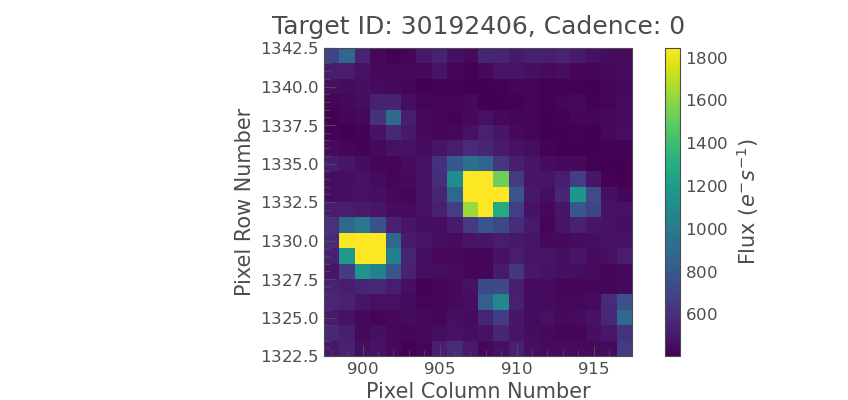

In [11]:
file = 'tpfs/tess30192406_sec3.fits'
tpf = lk.TessTargetPixelFile(file)
tpf.plot(cadenceno=0)

### Download all sectors from cycle 1 (i.e., from sector 1 to 13)

In [25]:
start_t =  time.perf_counter()

TICs = 374944608
sectors = np.arange(1,14)
download_tpfs(TICs, sectors=sectors)

end_t =  time.perf_counter()
duration = end_t - start_t
print(f'Duration: {duration} s')

/Users/stefano/Work/IvS/lc/codes/clean/tessutils2/get_images.py:145: LightkurveDeprecationWarning: The header function is deprecated and may be removed in a future version.
        Use get_header() instead.
  tpf.header.set('TICID',value=TIC)


Skipped: Already downloaded sectors for TIC=374944608: 1,2.
Saved: tpfs/tess374944608_sec3.fits
Saved: tpfs/tess374944608_sec4.fits
Saved: tpfs/tess374944608_sec5.fits
Saved: tpfs/tess374944608_sec6.fits
Saved: tpfs/tess374944608_sec7.fits
Saved: tpfs/tess374944608_sec8.fits
Saved: tpfs/tess374944608_sec9.fits
Saved: tpfs/tess374944608_sec10.fits
Saved: tpfs/tess374944608_sec11.fits
Saved: tpfs/tess374944608_sec12.fits
Saved: tpfs/tess374944608_sec13.fits
Duration: 27.038208584010135 s


### Download multiple stars at once. 

In [26]:
start_t =  time.perf_counter()

TICs = [374944608, 30192406, 38845463]
sectors = np.arange(1,14)
download_tpfs(TICs, progressbar=True, sectors=sectors)

end_t =  time.perf_counter()
duration = end_t - start_t
print(f'Duration: {duration} s')

 33%|███▎      | 1/3 [00:21<00:43, 21.58s/it]/Users/stefano/Work/IvS/lc/codes/clean/tessutils2/get_images.py:145: LightkurveDeprecationWarning: The header function is deprecated and may be removed in a future version.
        Use get_header() instead.
  tpf.header.set('TICID',value=TIC)
 67%|██████▋   | 2/3 [00:46<00:23, 23.49s/it]/Users/stefano/Work/IvS/lc/codes/clean/tessutils2/get_images.py:145: LightkurveDeprecationWarning: The header function is deprecated and may be removed in a future version.
        Use get_header() instead.
  tpf.header.set('TICID',value=TIC)
100%|██████████| 3/3 [00:49<00:00, 16.35s/it]

Skipped: Already downloaded sectors for TIC=374944608: 1,2,3,4,5,6,7,8,9,10,11,12,13.
Skipped: No new images to download for TIC=374944608.
Saved: tpfs/tess30192406_sec1.fits
Saved: tpfs/tess30192406_sec2.fits
Saved: tpfs/tess30192406_sec3.fits
Saved: tpfs/tess30192406_sec4.fits
Saved: tpfs/tess30192406_sec5.fits
Saved: tpfs/tess30192406_sec6.fits
Saved: tpfs/tess30192406_sec7.fits
Saved: tpfs/tess30192406_sec8.fits
Saved: tpfs/tess30192406_sec9.fits
Saved: tpfs/tess30192406_sec10.fits
Saved: tpfs/tess30192406_sec11.fits
Saved: tpfs/tess30192406_sec12.fits
Saved: tpfs/tess30192406_sec13.fits
Saved: tpfs/tess38845463_sec1.fits
Saved: tpfs/tess38845463_sec2.fits
Saved: tpfs/tess38845463_sec3.fits
Saved: tpfs/tess38845463_sec4.fits
Saved: tpfs/tess38845463_sec5.fits
Saved: tpfs/tess38845463_sec6.fits
Saved: tpfs/tess38845463_sec7.fits
Saved: tpfs/tess38845463_sec8.fits
Saved: tpfs/tess38845463_sec9.fits
Saved: tpfs/tess38845463_sec10.fits
Saved: tpfs/tess38845463_sec11.fits
Saved: tpfs/te

# Extracting LC

Explain the main parts of the process. [TODO]

1. Find aperture
2. PCA detrending

(refer to paper for extra information)



## Main functions

In [76]:
from tessutils2.LC_Extractor3 import extract_light_curve

In [6]:
extract_light_curve?

Signature: extract_light_curve(fits_filename, outputdir, return_msg=True)
Docstring: <no docstring>
File:      ~/Work/IvS/lc/codes/clean/tessutils2/LC_Extractor3.py
Type:      function


## Notes

1. Results are saved as Pickle files with extention ".pickled".
2. Each Pickle file shows the corresponding TIC and sector numbers in its file name.
3. Each Pickle file contains a Python dictionary that stores and organizes the results.
4. <code style="background:yellow;color:black">All paths (i.e., files and directories) given to following functions from `tessutils` must be a `Path` object and not as a `str` (see examples).</code>

## Examples

### Extract a corrected light curve from a TPF 

In [11]:
file = 'tpfs/tess374944608_sec9.fits'
outputdir = 'processed'

Convert string-like paths into `Path` objects (note #4)

In [7]:
file = Path(file)
outputdir = Path(outputdir)

In [8]:
extract_light_curve(file, outputdir)

'TIC 374944608 Sector 9: OK'

### Outputs

Read the dictionary from the Pickle file

In [3]:
file = 'processed/tess374944608_sec9_corrected.pickled'
with open(file, 'rb') as f:
    result = pickle.load(f)

List the keys and subkeys in the dictionary

In [4]:
for k1,v1 in result.items():
    print(0*' ', k1)
    if isinstance(v1, dict):
        for k2,v2 in v1.items():
            print(4*' ', k2)

 tic
 sector
 ra
 dec
 headers
 fit
     fitted_image
     intercept
     Plane
     TargetStar
     Neighbours
     slope_y
     slope_x
     neighbour_flux_ap
     target_flux_ap
     bkg_flux_ap
     fraction_contamination_ap
     fraction_bkg_change
 neighbours_all
     mag
     ra
     dec
 neighbours_used
     mag
     ra
     dec
     pix
 target
     mag
     ra
     dec
     pix
 aperture_threshold
 pca_all
     coef
     pc
     dm
     rc
     npc
     npc_used
     pc_variances
     threshold_variance
     nbins
 pca_used
     coef
     pc
     dm
     rc
     npc
 centroids
     col
     row
     sqrt_col2_row2
     time
 excluded_intervals
 lc_raw
     flux
     time
 lc_raw_nonan
     flux
     time
 lc_trend
     flux
     time
 lc_regressed
     flux
     time
     outlier_mask
     sigma_clipping
 lc_regressed_notoutlier
     flux
     time
 median_image
 masks
     aperture
     background
 tag


If the light curve extraction was succesful, the tag key will say OK.

In [10]:
result['tag']

'OK'

#### Aperture and background masks

In [36]:
from tessutils2.TESSplots_pickle2 import overplot_mask # Credits of the function: Timothy

Read results

In [10]:
# Median image of the cadences
image = result['median_image']

# Aperture mask based on the median image
ap_mask  = result['masks']['aperture']

# Background mask based on the median image
bkg_mask = result['masks']['background']

# Number of Median Absolute Deviations (MADs)
threshold = result['aperture_threshold']

In [11]:
threshold

5

Plot

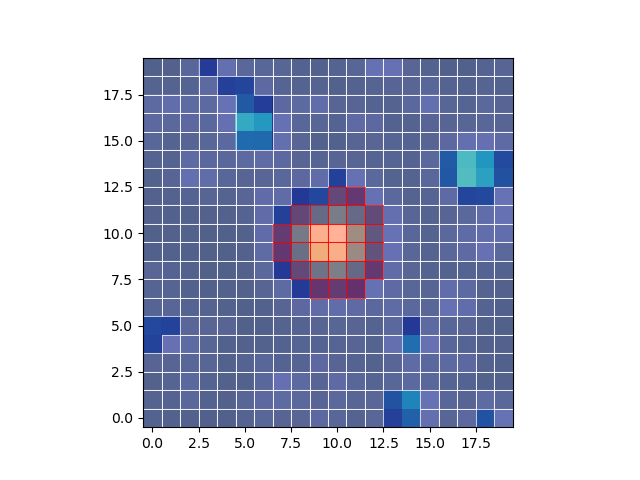

In [35]:
fig, ax = plt.subplots()

# Image
im = ax.imshow(np.log10(image), origin='lower', cmap = plt.cm.YlGnBu_r)

# Background mask
overplot_mask(ax,bkg_mask,ec='w',lw=0.1, fc='w', alpha=0.3)
overplot_mask(ax,bkg_mask,ec='w',lw=0.5, fc='none', alpha=1.0)

# Aperture mask
overplot_mask(ax,ap_mask,ec='r',lw=0.1, fc='r', alpha=0.3)
overplot_mask(ax,ap_mask,ec='r',lw=0.5, fc='none', alpha=1.0)

#### Neighbouring stars

In [45]:
from tessutils2.TESSplots_pickle2 import scalesymbols # Credits of the function: Timothy

Read results

In [65]:
# Median image of the cadences
image = result['median_image']

# Magnitudes of target and neighbouring stars
used_nb_tmag = result['neighbours_used']['mag'] 
target_tmag = result['target']['mag']

# Pixel location of target and neighbouring stars
target_coord_pix = result['target']['pix']
nb_coord_pix = result['neighbours_used']['pix'] 

Plot

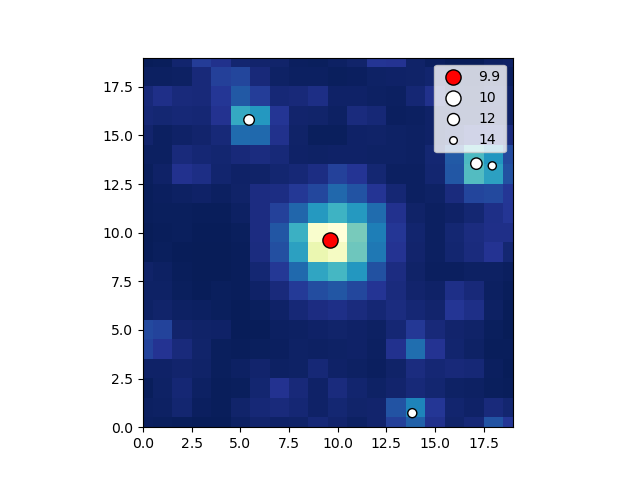

In [73]:
reference_tmag = [10, 12, 14]
tmags = np.r_[used_nb_tmag, target_tmag, reference_tmag]

fig, ax = plt.subplots()

# Image
im = ax.imshow(np.log10(image), origin='lower', cmap = plt.cm.YlGnBu_r)

# Plot target and neighbouring stars
im = ax.imshow(np.log10(image), origin='lower', cmap = plt.cm.YlGnBu_r)
sizes = scalesymbols(target_tmag, np.amin(tmags), np.amax(tmags))
ax.scatter(target_coord_pix[:,0], target_coord_pix[:,1], s=sizes, c='r', edgecolors='k', linewidth=1, label=f'{target_tmag:.1f}')
if nb_coord_pix.size > 0:
    sizes = scalesymbols(used_nb_tmag, np.amin(tmags), np.amax(tmags))
    ax.scatter(nb_coord_pix[:,0], nb_coord_pix[:,1], s=sizes, c='w', edgecolors='k', linewidth=1)

# Legend
if nb_coord_pix.size > 0:
    for size in [10,12,14]:
        sizes = scalesymbols(size*np.ones(1),np.amin(tmags), np.amax(tmags))
        ax.scatter(-1, -1, s=sizes, c='w', edgecolors='k', linewidth=1, label=f'{size}')
ax.set_xlim(0,image.shape[0]-1)
ax.set_ylim(0,image.shape[1]-1)
ax.legend(loc='best')

#### Contamination

Read results

In [5]:
# Median image of the cadences
image = result['median_image']

# Fitted image
image_fit = result['fit']['fitted_image']

Assess the quality of the fit visually

In [6]:
image_quality = np.abs(image-image_fit)/image

Plot

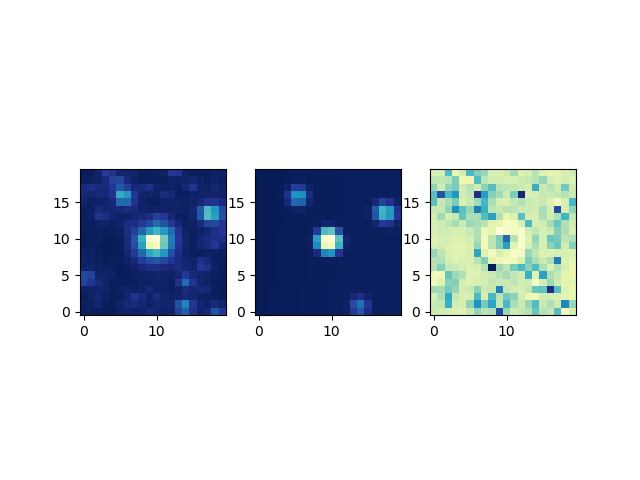

In [8]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3)

# Images
ax1.imshow(np.log10(image), origin='lower', cmap = plt.cm.YlGnBu_r)
ax2.imshow(np.log10(image_fit), origin='lower', cmap = plt.cm.YlGnBu_r)
ax3.imshow(np.log10(image_quality), origin='lower', cmap = plt.cm.YlGnBu_r)


Separate flux components:
1. Target star
2. Neighbouring stars
3. Background

In [23]:
# Read fit functions
TargetStar = result['fit']['TargetStar']
Plane = result['fit']['Plane']

# Generate grid
(xsize,ysize) = image.shape
y, x = np.mgrid[:xsize, :ysize]

# Compute images
image_TargetStar = TargetStar(x,y)
image_Background = Plane(x,y)
image_Neighbours = image_fit-image_TargetStar-image_Background

/var/folders/pv/4lz7c47j4d901p0hrt6r1s500000gn/T/ipykernel_38838/2083137824.py:5: RuntimeWarning: divide by zero encountered in log10
  ax2.imshow(np.log10(image_Neighbours), origin='lower', cmap = plt.cm.YlGnBu_r)
/var/folders/pv/4lz7c47j4d901p0hrt6r1s500000gn/T/ipykernel_38838/2083137824.py:5: RuntimeWarning: invalid value encountered in log10
  ax2.imshow(np.log10(image_Neighbours), origin='lower', cmap = plt.cm.YlGnBu_r)


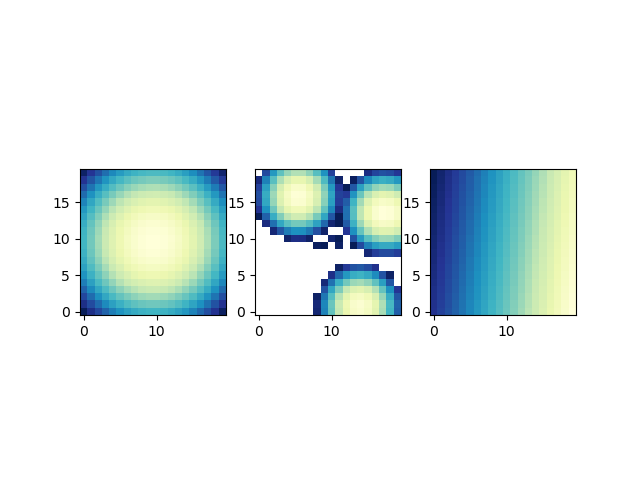

In [25]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3)

# Images
ax1.imshow(np.log10(image_TargetStar), origin='lower', cmap = plt.cm.YlGnBu_r)
ax2.imshow(np.log10(image_Neighbours), origin='lower', cmap = plt.cm.YlGnBu_r)
ax3.imshow(np.log10(image_Background), origin='lower', cmap = plt.cm.YlGnBu_r)

Assess the quality of the fit quantitatively

In [37]:
# Aperture mask based on the median image
ap_mask  = result['masks']['aperture']

targetStar_flux = image_TargetStar[ap_mask].sum()
neighbours_flux = image_Neighbours[ap_mask].sum()

print(f'Neighbour-target flux ratio: {100*neighbours_flux/targetStar_flux} %')

Neighbour-target flux ratio: 2.60658463569085e-13 %


#### PCA

Read results

In [38]:
# Light curve time array after PCA
time = result['lc_regressed']['time']

# Number of PCs
npc_all = result['pca_all']['npc'] 
npc_used = result['pca_used']['npc']

# Principal components (PCs)
pc_used = result['pca_used']['pc'][:-1] 
pc_all = result['pca_all']['pc'][:-1]

Plot

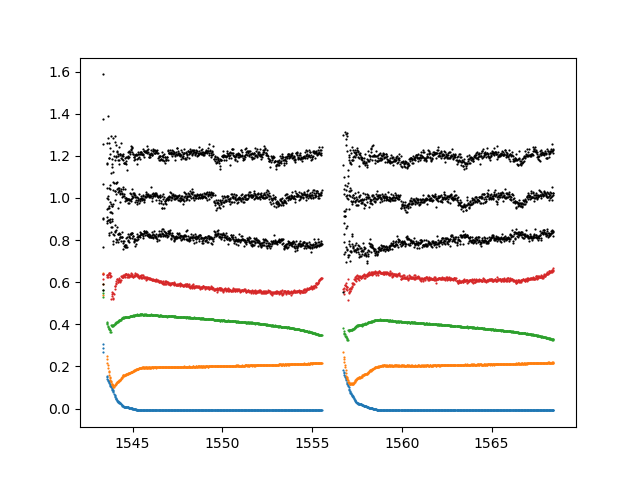

In [52]:
fig, ax = plt.subplots()

# PCs used to detrend the light curve
for i,pc in enumerate(pc_used):
    offset = i*0.2
    ax.scatter(time,pc+offset, marker='.', s=10, linewidths=0)

# PCs not used to detrend the light curve    
for pc in pc_all[npc_used:]:
    i+=1
    offset = i*0.2
    ax.scatter(time,pc+offset, marker='.', color='k', s=10, linewidths=0)

ax.set_xlabel('BJD - 2457000')

Coeficients of each PC used to detrend the light curve

In [55]:
result['pca_used']['coef']

array([ 1.84001501e+05, -2.63996471e+02,  4.76936155e+02, -2.14656283e+01,
        2.07481673e+04])

#### Corrected light curve

Read results

In [70]:
flux = result['lc_regressed_notoutlier']['flux']
time = result['lc_regressed_notoutlier']['time']

Plot

Text(0, 0.5, 'e/s')

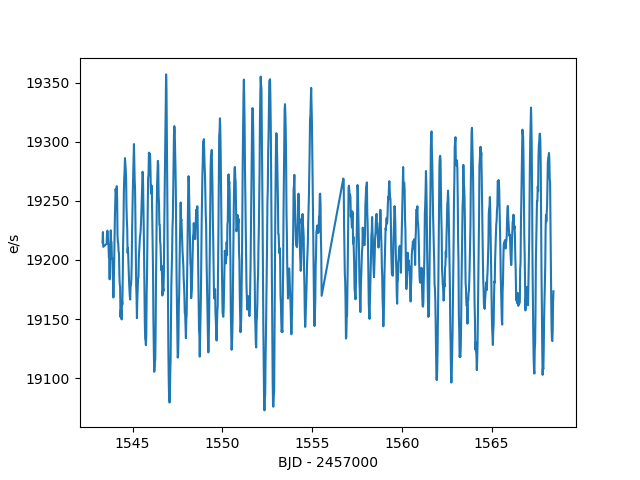

In [71]:
fig, ax = plt.subplots()
ax.plot(time,flux)
ax.set_xlabel('BJD - 2457000')
ax.set_ylabel('e/s')

Normalize the light curve

In [72]:
median = np.median(flux)
flux = (flux-median)/median

Plot

Text(0, 0.5, '$\\delta F/F \\ \\ (ppt)$')

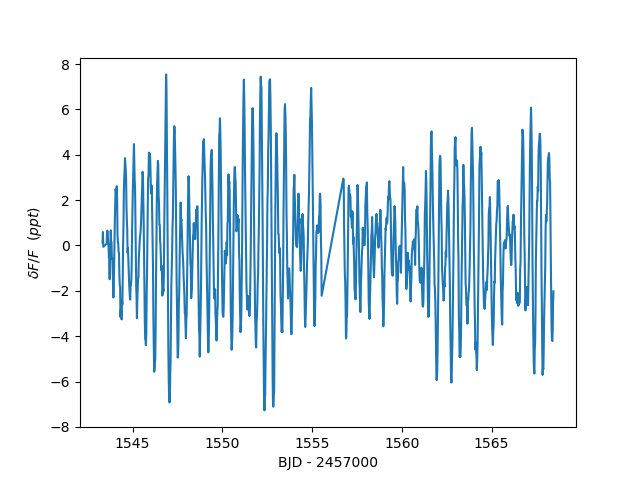

In [69]:
fig, ax = plt.subplots()
ax.plot(time,1000*flux)
ax.set_xlabel('BJD - 2457000')
ax.set_ylabel(r'$\delta F/F \ \ (ppt)$')

### Extract corrected light curves for all sectors

In [78]:
inputdir = Path('tpfs')
outputdir = Path('processed')
TIC = 374944608

for file in inputdir.glob(f'tess{TIC}_sec*.fits'):
    print(f'Working on {file.name}')
    extract_light_curve(file,outputdir)

Working on tess374944608_sec5.fits
Working on tess374944608_sec9.fits
Working on tess374944608_sec8.fits
Working on tess374944608_sec4.fits
Working on tess374944608_sec10.fits
Working on tess374944608_sec3.fits
Working on tess374944608_sec2.fits
Working on tess374944608_sec11.fits
Working on tess374944608_sec12.fits
Working on tess374944608_sec1.fits
Working on tess374944608_sec13.fits
Working on tess374944608_sec7.fits
Working on tess374944608_sec6.fits


### Group the results by their TIC number

In [79]:
from tessutils2.group_results2 import collect_corrected_lc

In [84]:
inputdir = Path('processed')
outputdir = Path('grouped')
collect_corrected_lc(outputdir=outputdir, inputdir=inputdir)

Grouping TIC 374944608: [0/1]


### Stitch corrected light curves

In [3]:
from tessutils2.get_lcs_from_groups2 import extract_stitched_lcs

In [4]:
inputdir = Path('grouped')
outputdir = Path('lcs')
extract_stitched_lcs(OutputDir=outputdir, InputDir=inputdir)

Working on 1/1, TIC 374944608


#### Outputs

Read

In [24]:
lc = pd.read_csv('lcs/lc_tess374944608_corrected_stitched.csv')

Plot

Text(0, 0.5, '$\\delta F/F \\ \\ (ppt)$')

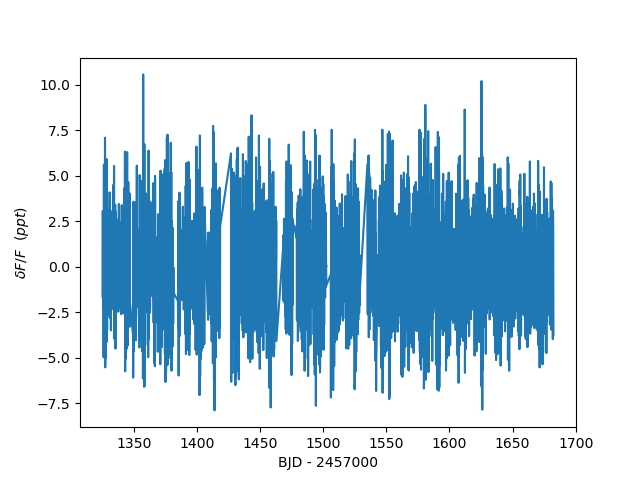

In [27]:
fig, ax = plt.subplots()
ax.plot(lc.time,1000*lc.flux)
ax.set_xlabel('BJD - 2457000')
ax.set_ylabel(r'$\delta F/F \ \ (ppt)$')

### Generate summary plot

In [28]:
from tessutils2.TESSplots_pickle2 import create_only_plot_pickle

In [31]:
TIC = 374944608
file = Path(f'grouped/tess{TIC}_allsectors_corrected.pickled')

fig = create_only_plot_pickle(file)
fig.savefig(f'summary_TIC{TIC}.pdf',bbox_inches='tight')
plt.close(fig)

SECTOR: 1
SAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
SECTOR: 2
SAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
SECTOR: 3
SAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
SECTOR: 4
SAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
SECTOR: 5
SAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
SECTOR: 6
SAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
SECTOR: 7
SAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
SECTOR: 8
SAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
SECTOR: 9
SAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
SECTOR: 10
SAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
SECTOR: 11
SAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
SECTOR: 12
SAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
SECTOR: 13
SAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA


/Users/stefano/Work/IvS/lc/codes/clean/tessutils2/TESSplots_pickle2.py:721: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
